# **Import libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
from matplotlib import style

# **Read data into dataframe**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/UIT-Learning/TERM6/Data Mining/ĐỒ ÁN/DataCoSupplyChainDataset.csv', encoding='unicode_escape')
# latin-1

In [4]:
df.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# **Resolve missing values**

## **Identify missing values**

In [6]:
def feature_missing_values(df):
  x = df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100
  print('Percentage of Missing Values: ', round(x,2), '%')

  for col in df.columns:
    if df[col].isnull().sum() > 0:
      print(col + ' - ' + str(df[col].isnull().sum()) + ' missing values')

feature_missing_values(df)

Percentage of Missing Values:  3.51 %
Customer Lname - 8 missing values
Customer Zipcode - 3 missing values
Order Zipcode - 155679 missing values
Product Description - 180519 missing values


## **Drop columns that unuseful or null**

In [7]:
df.drop(['Customer Zipcode','Order Zipcode','Product Description'], axis='columns', inplace=True)

# **Using Heatmap to identify Columns that have duplicate values**

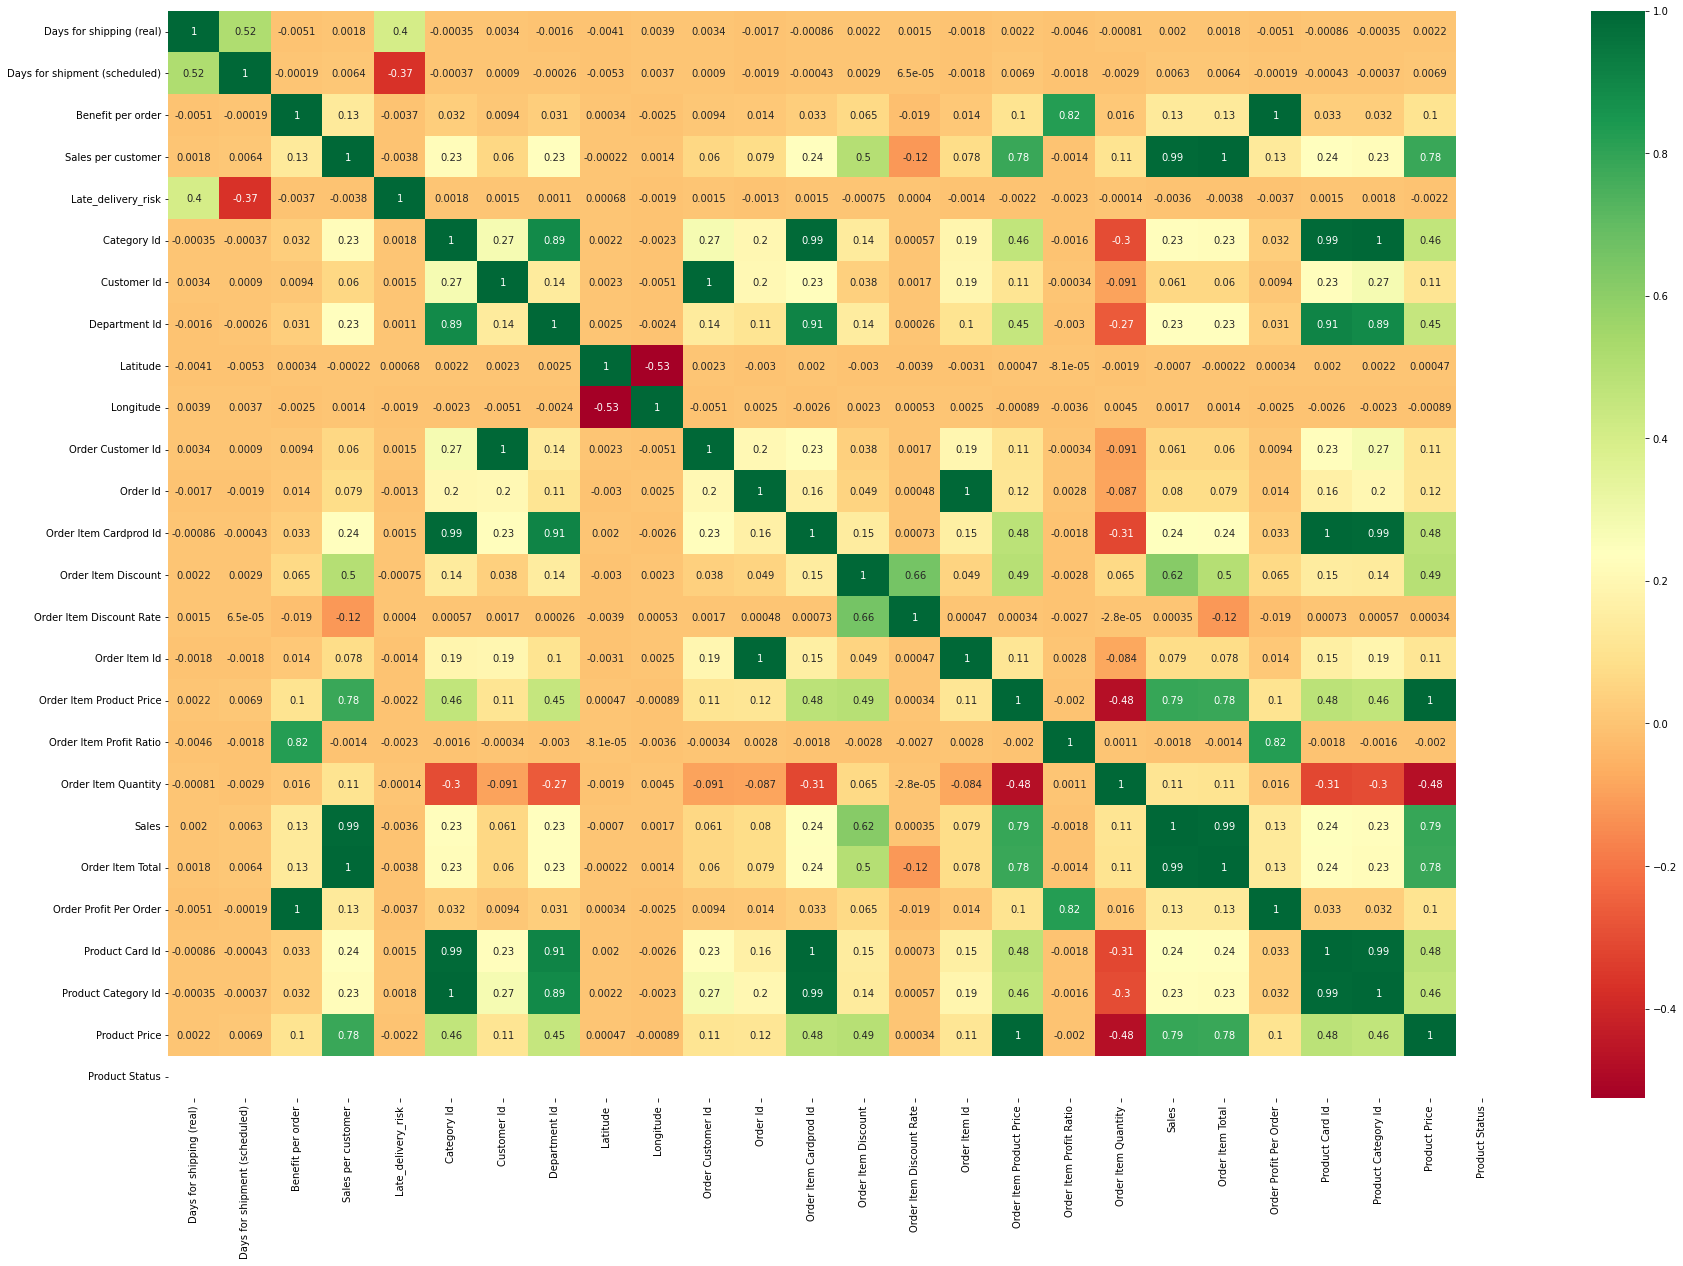

In [8]:
plt.figure(figsize=(30,20))
g = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

**Insight from Heatmap:**


1.   **Columns that are similar with same values (maybe duplicate)**
*   [Benefit per order] - Order Profit Per Order
*   [Sales per customer] - Order Item Total, Sales
*   [Category Id] - Order Item Cardprod Id, Product Card Id, Product Category Id
*   [Customer Id] - Order Customer Id
*[Product Price] - Order Item Product Price
2.   **Features that have null or less correlated values**
* Product Status



## **Drop columns that have duplicate values or same meaning**

In [9]:
df = df.drop(['Benefit per order','Sales per customer','Order Customer Id', 'Order Item Product Price',
              'Product Status','Product Image','Order Item Cardprod Id']
             ,axis='columns')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Delivery Status                180519 non-null  object 
 4   Late_delivery_risk             180519 non-null  int64  
 5   Category Id                    180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   Customer City                  180519 non-null  object 
 8   Customer Country               180519 non-null  object 
 9   Customer Email                 180519 non-null  object 
 10  Customer Fname                 180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Lname                

# **Resolve columns that have only 1 unique value**

## **Identify columns**

In [11]:
def check_unique_val(df):
  flag = False
  unique_val_cols = []
  for col in df.columns:
    num_unique_val = len(df[col].value_counts())
    if num_unique_val == 1:
      print(col, " has only 1 unique value: ", df[col].value_counts().index[0])
      unique_val_cols.append(col)
      flag != flag
  if flag:
    return unique_val_cols
  else:
    return "Not any columns that have only 1 unique value"

unique_val_cols = check_unique_val(df)

Customer Email  has only 1 unique value:  XXXXXXXXX
Customer Password  has only 1 unique value:  XXXXXXXXX


## **Drop columns**

In [12]:
df.drop(['Customer Email','Customer Password'], axis='columns', inplace=True)

# **Rename columns**

## **Replace space with underline**

In [13]:
names = {raw_name:raw_name.replace(" ", "_") for raw_name in df.columns}
df_prep = df.rename(columns=names)
df_prep.head()

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Fname,...,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Irene,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Gillian,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Tana,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


## **Custom rename**

In [14]:
df_prep.rename(columns={'Type':'Payment_Method'}, inplace=True)
df_prep.rename(columns={'Days_for_shipping_(real)':'Real_Days_Shipping'}, inplace=True)
df_prep.rename(columns={'Days_for_shipment_(scheduled)':'Scheduled_Days_Shipping'}, inplace=True)
df_prep.rename(columns={'Market':'Order_Market'}, inplace=True)
df_prep.rename(columns={'order_date_(DateOrders)':'Order_Date'}, inplace=True)
df_prep.rename(columns={'Order_Item_Cardprod_Id':'Item_ID'}, inplace=True)
df_prep.rename(columns={'Product Name':'Item_Name'}, inplace=True)
df_prep.rename(columns={'Order_Item_Product_Price':'Item_Price'}, inplace=True)
df_prep.rename(columns={'Order_Item_Discount':'Item_Discount'}, inplace=True)
df_prep.rename(columns={'Order_Item_Quantity':'Quantity'}, inplace=True)
df_prep.rename(columns={'Sales':'Estimate_Value'}, inplace=True)
df_prep.rename(columns={'Order_Item_Total':'Real_Value'}, inplace=True)
df_prep.rename(columns={'Order_Profit_Per_Order':'Order_Profit'}, inplace=True)
df_prep.rename(columns={'shipping_date_(DateOrders)':'Shipping_Date'}, inplace=True)
df_prep.rename(columns={'Late_delivery_risk':'Late_Delivery_Risk'}, inplace=True)
df_prep.rename(columns={'Order_Item_Discount_Rate':'Item_Discount_Rate'}, inplace=True)

In [17]:
pd.set_option('display.max_columns',50)
df_prep.head()

,Payment_Method,Real_Days_Shipping,Scheduled_Days_Shipping,Delivery_Status,Late_Delivery_Risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Department_Id,Department_Name,Latitude,Longitude,Order_Market,Order_City,Order_Country,Order_Date,Order_Id,Item_Discount,Item_Discount_Rate,Order_Item_Id,Order_Item_Profit_Ratio,Quantity,Estimate_Value,Real_Value,Order_Profit,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Shipping_Date,Shipping_Mode
0,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,31-01-2018,77202,13.110000,0.04,180517,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,03-02-2018,Standard Class
1,TRANSFER,5,4,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Luna,Consumer,PR,2679 Rustic Loop,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,13-01-2018,75939,16.389999,0.05,179254,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,18-01-2018,Standard Class
2,CASH,4,4,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,13-01-2018,75938,18.030001,0.06,179253,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,17-01-2018,Standard Class
3,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,13-01-2018,75937,22.940001,0.07,179252,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,16-01-2018,Standard Class
4,PAYMENT,2,4,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,13-01-2018,75936,29.500000,0.09,179251,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,15-01-2018,Standard Class


* Order_Item_Id: là id của sản phẩm trong đơn hàng chứ ko phải id sản phẩm
* Order_Item_Profit_Ratio: tỉ lệ lợi nhuận của sản phẩm trong đơn hàng (thay đổi theo tưng đơn hàng chứ ko cố định)

# **Change Datetime datatype**

In [16]:
df_prep['Shipping_Date'] = pd.to_datetime(df_prep['Shipping_Date'], format='%m/%d/%Y %H:%M')
df_prep['Shipping_Date'] = df_prep['Shipping_Date'].dt.strftime('%d-%m-%Y')
df_prep['Order_Date'] = pd.to_datetime(df_prep['Order_Date'], format='%m/%d/%Y %H:%M')
df_prep['Order_Date'] = df_prep['Order_Date'].dt.strftime('%d-%m-%Y')